ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4
 
=====  ЧАСТЬ 2  =====
Реализуйте вычисление критерия однородности, отличного от представленного. 
Сравните результаты.
--------------------------------------------------------------------------------
Критерий: МЕДИАНА
Затравочная точка: (250, 250), r=5, T=20
Итерация 1: добавлено 91 пикселей
Итерация 2: добавлено 257 пикселей
Итерация 3: добавлено 415 пикселей
Итерация 4: добавлено 565 пикселей
Итерация 5: добавлено 733 пикселей
Итерация 6: добавлено 901 пикселей
Итерация 7: добавлено 1044 пикселей
Итерация 8: добавлено 1205 пикселей
Итерация 9: добавлено 1306 пикселей
Итерация 10: добавлено 1054 пикселей
Итерация 11: добавлено 1095 пикселей
Итерация 12: добавлено 1073 пикселей
Итерация 13: добавлено 1015 пикселей
Итерация 14: добавлено 959 пикселей
Итерация 15: добавлено 941 пикселей
Итерация 16: добавлено 861 пикселей
Итерация 17: добавлено 819 пикселей
Итерация 18: добавлено 760 пикселей
Итерация 19: добавлено 695 пикселей
Итерация 2

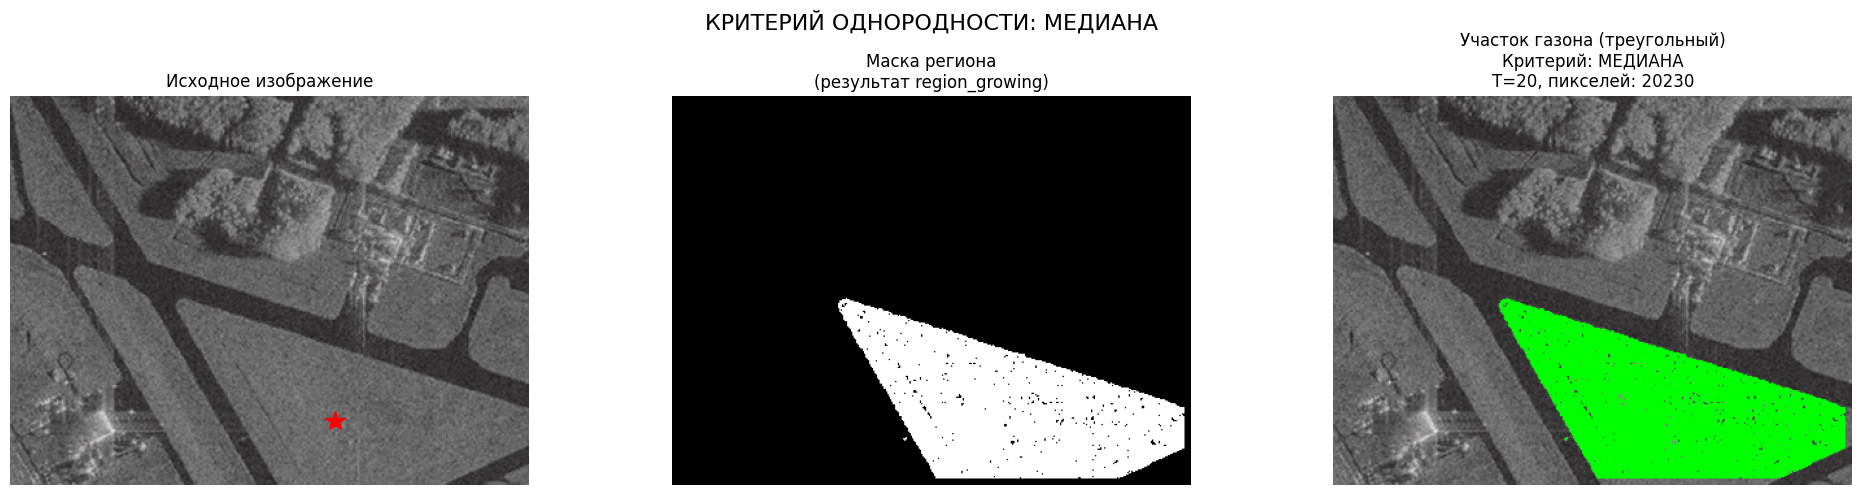


СРАВНИТЕЛЬНАЯ СТАТИСТИКА:
--------------------------------------------------
Критерий 'МЕДИАНА':   20230 пикселей
Площадь региона:     20230 пикселей
Процент от изображения: 16.86%

АНАЛИЗ РЕЗУЛЬТАТОВ:
--------------------------------------------------
Критерий МЕДИАНА:
   - Устойчив к выбросам
   - Более точные границы региона
   - Медленнее вычисляется
   - Успешно выделяет треугольный участок газона

ВЫВОД: Алгоритм region_growing с критерием медианы успешно
выделил однородный участок газона треугольной формы.


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4")
print("="*50)
print(" ")

###2 ЗАДАНИЕ : Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
print("="*5, " ЧАСТЬ 2 ", "="*5)
print("Реализуйте вычисление критерия однородности, отличного от представленного. \nСравните результаты.")
print("-"*80)

# Загружаем изображение
image = cv2.imread('sar_1.jpg')
if image is None:
    raise FileNotFoundError("Файл sar_1.jpg не найден!")

# Переводим в серый
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# критерий однородности (медиана)
def homo_median(img, mask, point, T):
    region_vals = img[mask > 0]

    med_val = np.median(region_vals)

    return abs(med_val - img[point]) <= T


# Функция разрастания регионов
def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    iteration = 0
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        iteration += 1
        if count > 0:
            print(f"Итерация {iteration}: добавлено {count} пикселей")
        mask += local_mask

    return mask * 255


seed_point = (250, 250)

# Применяем критерий медианы
print("Критерий: МЕДИАНА")
print(f"Затравочная точка: {seed_point}, r=5, T=20")
mask2 = region_growing(image_gray, seed_point, homo_median, 5, 20)
print()

# Визуализация сравнения
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Исходное изображение')
plt.plot(seed_point[1], seed_point[0], 'r*', markersize=15)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask2, cmap='gray')
plt.title('Маска региона\n(результат region_growing)')
plt.axis('off')

plt.subplot(1, 3, 3)
result2 = image.copy()
result2[mask2 > 0] = [0, 255, 0]
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title(f'Участок газона (треугольный)\nКритерий: МЕДИАНА\nT=20, пикселей: {np.count_nonzero(mask2)}')
plt.axis('off')

plt.suptitle("КРИТЕРИЙ ОДНОРОДНОСТИ: МЕДИАНА", fontsize=16)
plt.tight_layout()
plt.show()

# Сравнительная статистика
print("\nСРАВНИТЕЛЬНАЯ СТАТИСТИКА:")
print("-" * 50)
print(f"Критерий 'МЕДИАНА':  {np.count_nonzero(mask2):6d} пикселей")
print(f"Площадь региона:     {np.count_nonzero(mask2)} пикселей")
print(f"Процент от изображения: {100 * np.count_nonzero(mask2) / (image_gray.shape[0] * image_gray.shape[1]):.2f}%")

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("-" * 50)
print("Критерий МЕДИАНА:")
print("   - Устойчив к выбросам")
print("   - Более точные границы региона")
print("   - Медленнее вычисляется")
print("   - Успешно выделяет треугольный участок газона")

print("\nВЫВОД: Алгоритм region_growing с критерием медианы успешно")
print("выделил однородный участок газона треугольной формы.")